# Endometriosis Dataset

## Data loading


In [1]:
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency, pearsonr
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE


In [3]:
file_path = r"C:\Users\lenovo\Downloads\Data for the final project of Data Mining\structured_endometriosis_data.csv"
df_Endometriosis = pd.read_csv(file_path)
df_Endometriosis.head()


,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
0,24,1,8.361531,0,0,19.451314,0
1,37,1,4.995508,0,0,22.388436,0
2,46,1,3.363996,1,0,21.320443,0
3,32,1,5.246037,0,0,20.177715,1
4,28,1,3.898932,1,0,23.538103,1


In [34]:
df_Endometriosis.describe().loc[["min", "max"]].transpose()

,min,max
Age,18.0,49.000000
Menstrual_Irregularity,0.0,1.000000
Chronic_Pain_Level,0.0,10.000000
Hormone_Level_Abnormality,0.0,1.000000
Infertility,0.0,1.000000
BMI,15.0,37.146127
Diagnosis,0.0,1.000000
Diagnosis_numeric,0.0,1.000000


## Data exploration

In [4]:
print(df_Endometriosis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Menstrual_Irregularity     10000 non-null  int64  
 2   Chronic_Pain_Level         10000 non-null  float64
 3   Hormone_Level_Abnormality  10000 non-null  int64  
 4   Infertility                10000 non-null  int64  
 5   BMI                        10000 non-null  float64
 6   Diagnosis                  10000 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 547.0 KB
None


In [5]:
# Check for missing values
print(df_Endometriosis.isnull().sum()) 

Age                          0
Menstrual_Irregularity       0
Chronic_Pain_Level           0
Hormone_Level_Abnormality    0
Infertility                  0
BMI                          0
Diagnosis                    0
dtype: int64


In [6]:
print("\nDescriptive Statistics")
display(df_Endometriosis.describe(include='all'))


Descriptive Statistics


,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,33.692300,0.697500,5.030619,0.591100,0.298300,23.052865,0.407900
std,9.205308,0.459364,1.983955,0.491655,0.457535,3.891615,0.491469
min,18.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,26.000000,0.000000,3.671697,0.000000,0.000000,20.329327,0.000000
50%,34.000000,1.000000,5.035825,1.000000,0.000000,23.036315,0.000000
75%,42.000000,1.000000,6.396854,1.000000,1.000000,25.712923,1.000000
max,49.000000,1.000000,10.000000,1.000000,1.000000,37.146127,1.000000


In [7]:
# Count unique values in each column
unique_counts =df_Endometriosis.nunique()
print("\nUnique Values Count:\n", unique_counts)


Unique Values Count:
 Age                            32
Menstrual_Irregularity          2
Chronic_Pain_Level           9875
Hormone_Level_Abnormality       2
Infertility                     2
BMI                          9776
Diagnosis                       2
dtype: int64


In [8]:
duplicates = df_Endometriosis[df_Endometriosis.duplicated()]
print(f"Number of duplicated rows: {duplicates.shape[0]}")
print(duplicates)

Number of duplicated rows: 0
Empty DataFrame
Columns: [Age, Menstrual_Irregularity, Chronic_Pain_Level, Hormone_Level_Abnormality, Infertility, BMI, Diagnosis]
Index: []


In [29]:
# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:")
print(df_Endometriosis['Diagnosis'].value_counts(normalize=True))



Target Variable Distribution:
0    0.5921
1    0.4079
Name: Diagnosis, dtype: float64


## Data visualization

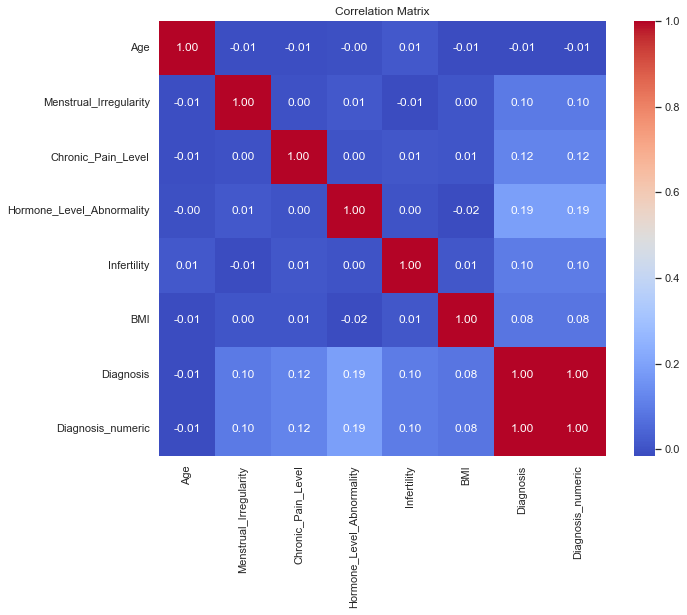


Correlation with Diagnosis:
 Diagnosis                    1.000000
Diagnosis_numeric            1.000000
Hormone_Level_Abnormality    0.187039
Chronic_Pain_Level           0.116996
Infertility                  0.096172
Menstrual_Irregularity       0.095197
BMI                          0.080310
Age                         -0.011559
Name: Diagnosis, dtype: float64


In [35]:
# -------------------------------
# Correlation Analysis
# -------------------------------
plt.figure(figsize=(10, 8))
corr = df_Endometriosis.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Focus on correlation with 'Diagnosis'
diagnosis_corr = corr['Diagnosis'].sort_values(ascending=False)
print("\nCorrelation with Diagnosis:\n", diagnosis_corr)

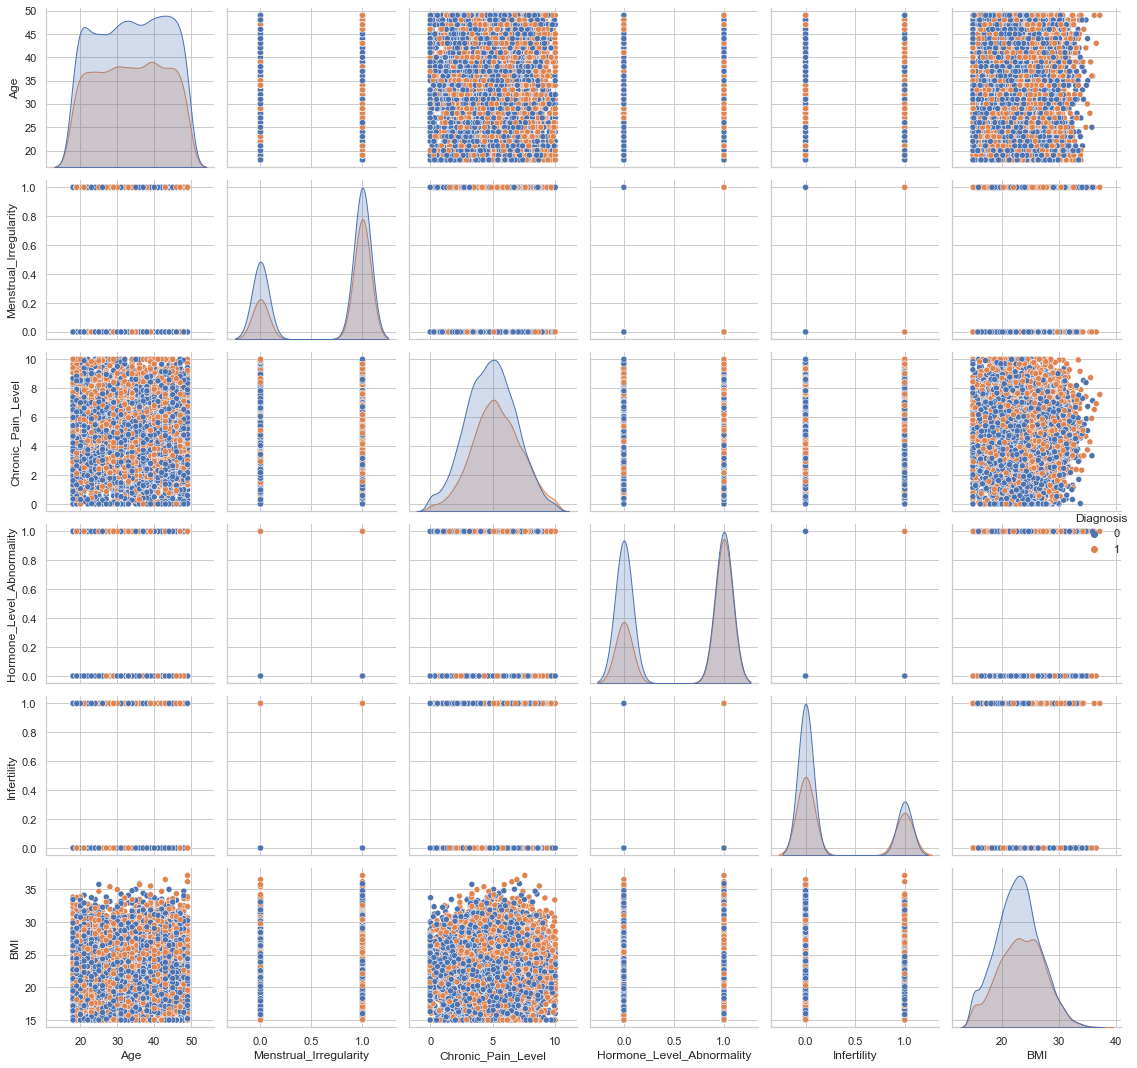

In [10]:
sns.set(style="whitegrid")
pairplot_fig = sns.pairplot(df_Endometriosis, hue="Diagnosis", diag_kind='kde')
pairplot_fig.fig.tight_layout()
plt.show()

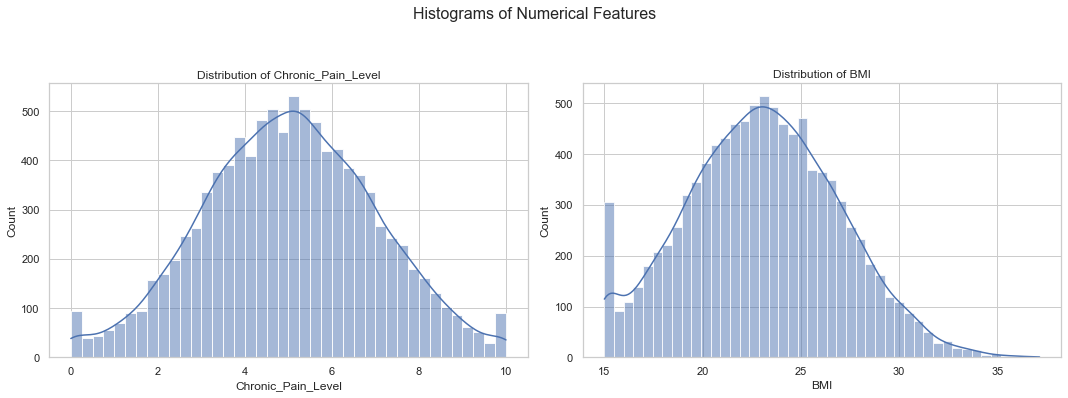

In [11]:
# Histograms for Numerical Features
plt.figure(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
for i, col in enumerate(['Chronic_Pain_Level', 'BMI']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_Endometriosis[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

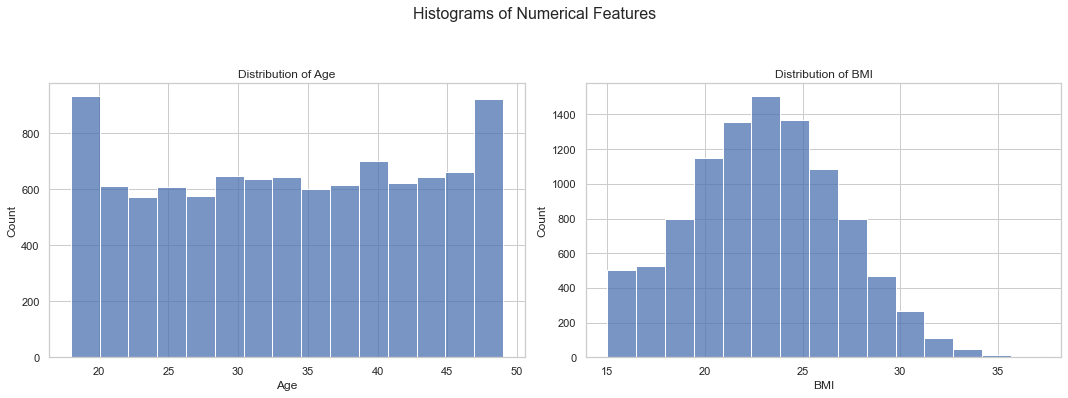

In [31]:
plt.figure(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)

for i, col in enumerate(['Age', 'BMI']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df_Endometriosis[col], bins=15, kde=False)
    plt.title(f'Distribution of {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [36]:
# Count of each age value in the dataset
df_Endometriosis['Age'].value_counts().sort_index()


18    298
19    310
20    324
21    312
22    299
23    298
24    276
25    321
26    288
27    283
28    292
29    305
30    342
31    292
32    345
33    288
34    357
35    293
36    309
37    306
38    309
39    351
40    349
41    302
42    322
43    341
44    303
45    342
46    321
47    318
48    279
49    325
Name: Age, dtype: int64

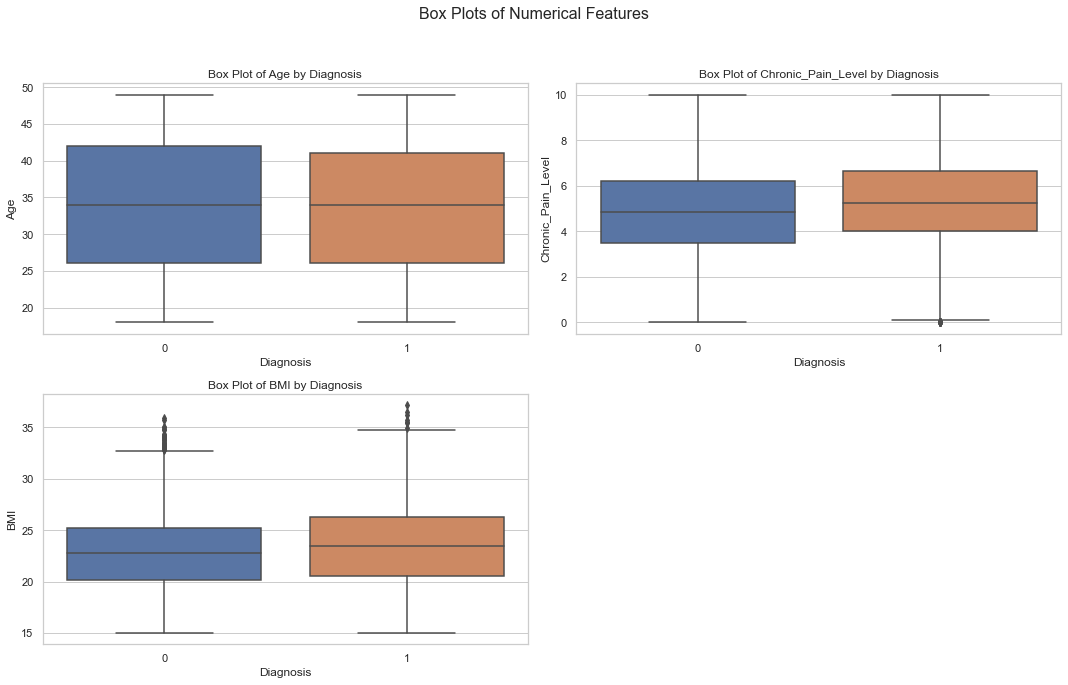

In [13]:
# Box Plots for Numerical Features
plt.figure(figsize=(15, 10))
plt.suptitle('Box Plots of Numerical Features', fontsize=16)
for i, col in enumerate(['Age', 'Chronic_Pain_Level', 'BMI']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Diagnosis', y=col, data=df_Endometriosis)
    plt.title(f'Box Plot of {col} by Diagnosis')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

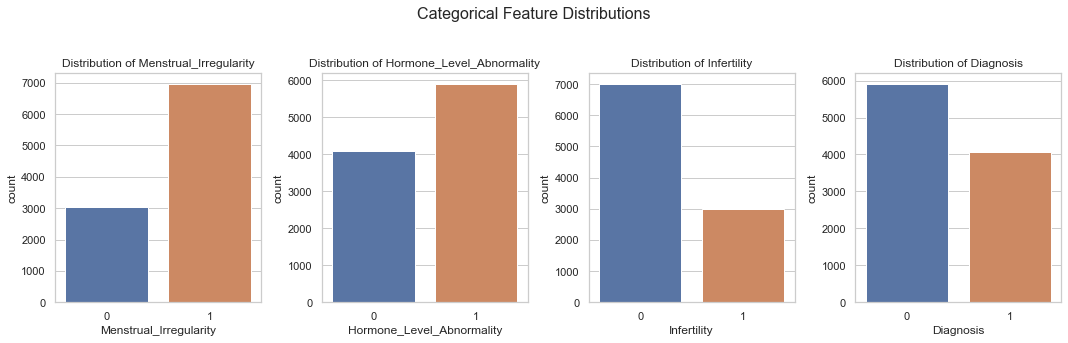

In [14]:
# Categorical Feature Distributions
plt.figure(figsize=(15, 5))
plt.suptitle('Categorical Feature Distributions', fontsize=16)
for i, col in enumerate(['Menstrual_Irregularity', 'Hormone_Level_Abnormality','Infertility', 'Diagnosis']):
    plt.subplot(1, 4, i + 1)
    sns.countplot(x=col, data=df_Endometriosis)
    plt.title(f'Distribution of {col}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

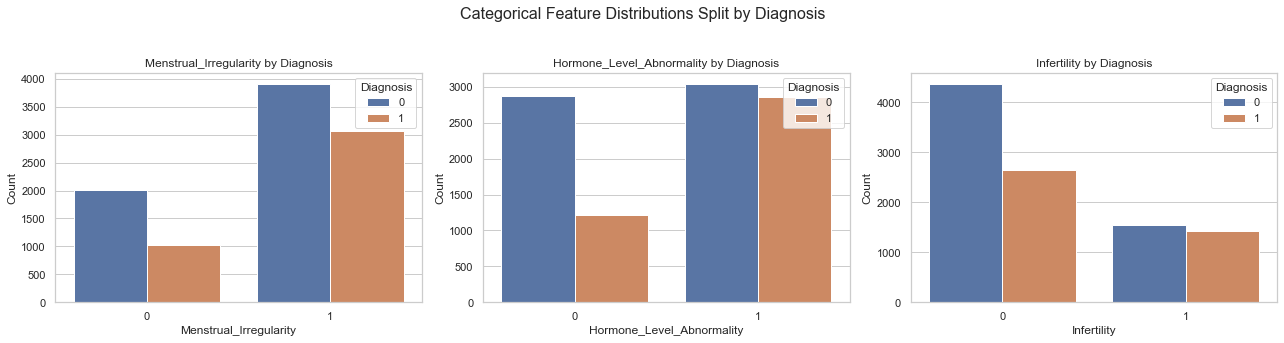

In [15]:
categorical_features = ['Menstrual_Irregularity', 'Hormone_Level_Abnormality', 'Infertility']

plt.figure(figsize=(18, 5))
plt.suptitle('Categorical Feature Distributions Split by Diagnosis', fontsize=16)

for i, col in enumerate(categorical_features):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, hue='Diagnosis', data=df_Endometriosis)
    plt.title(f'{col} by Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


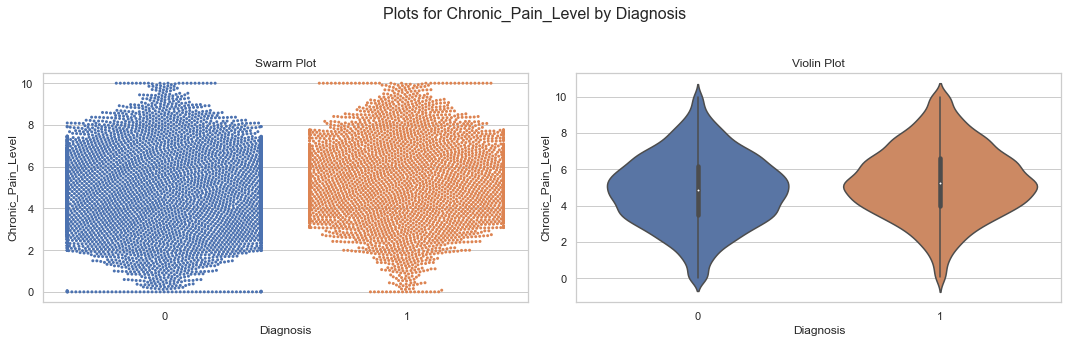

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


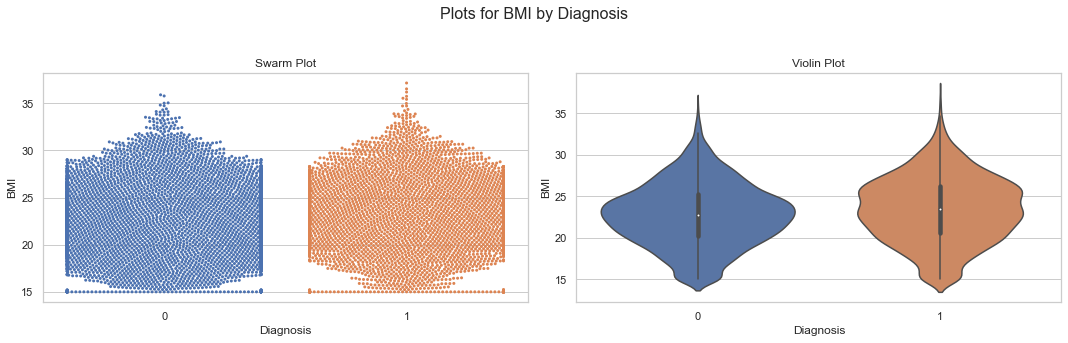

In [16]:
# Strip Plots, Swarm Plots, and Violin Plots for Numerical Features
numerical_features = ['Chronic_Pain_Level', 'BMI']
for col in numerical_features:
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'Plots for {col} by Diagnosis', fontsize=16)

    plt.subplot(1, 2, 1)
    sns.swarmplot(x='Diagnosis', y=col, data=df_Endometriosis, size=3)
    plt.title('Swarm Plot')

    plt.subplot(1, 2, 2)
    sns.violinplot(x='Diagnosis', y=col, data=df_Endometriosis)
    plt.title('Violin Plot')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

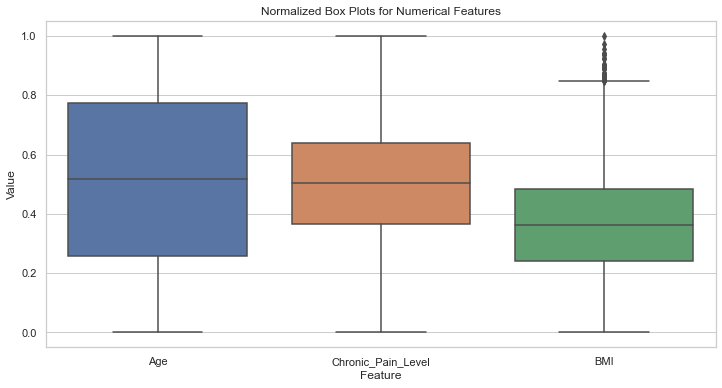

In [17]:
# Select numerical columns
numerical_cols = ['Age', 'Chronic_Pain_Level', 'BMI']

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_Endometriosis[numerical_cols])
df_normalized = pd.DataFrame(normalized_data, columns=numerical_cols)

# Melt for plotting
df_melted = df_normalized.melt(var_name='Feature', value_name='Value')

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title('Normalized Box Plots for Numerical Features')
plt.show()


## Data analysis

In [37]:
# Pearson Correlation (for numerical features)
print("Pearson Correlation with Diagnosis")
for col in ['Age', 'Chronic_Pain_Level', 'Hormone_Level_Abnormality', 'BMI']:
    # Convert Diagnosis to numeric if it's not already (assuming 0 and 1)
    df_Endometriosis['Diagnosis_numeric'] = df_Endometriosis['Diagnosis']
    correlation, p_value = pearsonr(df_Endometriosis[col], df_Endometriosis['Diagnosis_numeric'])
    print(f"  {col} vs. Diagnosis: correlation = {correlation:.4f}, p-value = {p_value:.4f}")

#Statistical Tests
print("\nStatistical Tests:")
categorical_features = ['Menstrual_Irregularity', 'Infertility']
for col in categorical_features:
    contingency_table = pd.crosstab(df_Endometriosis[col], df_Endometriosis['Diagnosis'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {col} vs. Diagnosis:")
    print(f"  p-value: {p}")
    
for col in numerical_features:
    group0 = df_Endometriosis[df_Endometriosis['Diagnosis'] == 0][col]
    group1 = df_Endometriosis[df_Endometriosis['Diagnosis'] == 1][col]
    t_statistic, p_value = ttest_ind(group0, group1)
    print(f"\nT-test for {col} vs. Diagnosis:")
    print(f"  p-value: {p_value}")



Pearson Correlation with Diagnosis
  Age vs. Diagnosis: correlation = -0.0116, p-value = 0.2478
  Chronic_Pain_Level vs. Diagnosis: correlation = 0.1170, p-value = 0.0000
  Hormone_Level_Abnormality vs. Diagnosis: correlation = 0.1870, p-value = 0.0000
  BMI vs. Diagnosis: correlation = 0.0803, p-value = 0.0000

Statistical Tests:
Chi-squared test for Menstrual_Irregularity vs. Diagnosis:
  p-value: 2.149337936523963e-21
Chi-squared test for Infertility vs. Diagnosis:
  p-value: 8.396255071581354e-22

T-test for Age vs. Diagnosis:
  p-value: 0.2477648424815099

T-test for Chronic_Pain_Level vs. Diagnosis:
  p-value: 8.09365184751324e-32

T-test for BMI vs. Diagnosis:
  p-value: 8.764850160648458e-16


## Model Traning

###  Model Traning - with 10-fold cross-validation only

In [32]:
# Separate features (X) and target (y)
X = df_Endometriosis.drop(columns=['Diagnosis', 'Diagnosis_numeric'])
y = df_Endometriosis['Diagnosis']

# Identify categorical and numerical features
categorical_features = ['Menstrual_Irregularity','Hormone_Level_Abnormality' , 'Infertility']
numerical_features = ['Age', 'Chronic_Pain_Level','BMI']


# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Define models
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42)
}

# Evaluation metrics to collect
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Store results
results = {}

# 10-fold cross-validation
n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Calculate metrics for the current fold
        model_scores['accuracy'].append(accuracy_score(y_test, y_pred))
        model_scores['precision'].append(precision_score(y_test, y_pred))
        model_scores['recall'].append(recall_score(y_test, y_pred))
        model_scores['f1'].append(f1_score(y_test, y_pred))
        model_scores['roc_auc'].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

    # Calculate mean scores and store in results
    results[model_name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[model_name]['confusion_matrix'] = np.mean(confusion_matrices, axis=0).astype(int) # Average confusion matrix

# Compare models
print("\nModel Comparison (Mean scores across 10 folds):")
comparison_df = pd.DataFrame(results).T
print(comparison_df)

# Display average confusion matrices
print("\nAverage Confusion Matrices (across 10 folds):")
for model_name, result in results.items():
    print(f"\n{model_name}:\n{result['confusion_matrix']}")

Training and evaluating KNeighborsClassifier...
Training and evaluating DecisionTreeClassifier...
Training and evaluating RandomForestClassifier...
Training and evaluating GradientBoostingClassifier...

Model Comparison (Mean scores across 10 folds):
                           accuracy precision    recall        f1   roc_auc  \
KNeighborsClassifier         0.5912   0.49873  0.433628  0.463762   0.59324   
DecisionTreeClassifier       0.5525  0.452144  0.461026  0.456389  0.537984   
RandomForestClassifier       0.5937  0.502632  0.401801  0.446222  0.604032   
GradientBoostingClassifier   0.6252  0.566094  0.347311  0.430145   0.65045   

                                    confusion_matrix  
KNeighborsClassifier        [[414, 177], [231, 176]]  
DecisionTreeClassifier      [[364, 227], [219, 188]]  
RandomForestClassifier      [[429, 162], [243, 164]]  
GradientBoostingClassifier  [[483, 108], [266, 141]]  

Average Confusion Matrices (across 10 folds):

KNeighborsClassifier:
[[414 17

###  Model Traning - with 10-fold cross-validation only with balanced data

In [39]:
from imblearn.under_sampling import RandomUnderSampler

X = df_Endometriosis.drop(columns=['Diagnosis', 'Diagnosis_numeric'])
y = df_Endometriosis['Diagnosis']


categorical_features = ['Menstrual_Irregularity', 'Hormone_Level_Abnormality', 'Infertility']
numerical_features = ['Age', 'Chronic_Pain_Level', 'BMI']

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=42)
}

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# ---  Cross-validation with undersampling ---
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    model_scores = {metric: [] for metric in metrics}
    confusion_matrices = []

    for fold, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply Random UnderSampling only on training data
        rus = RandomUnderSampler(random_state=42)
        X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

        # Fit and predict
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Evaluate metrics
        model_scores['accuracy'].append(accuracy_score(y_test, y_pred))
        model_scores['precision'].append(precision_score(y_test, y_pred))
        model_scores['recall'].append(recall_score(y_test, y_pred))
        model_scores['f1'].append(f1_score(y_test, y_pred))
        model_scores['roc_auc'].append(roc_auc_score(y_test, y_prob))
        confusion_matrices.append(confusion_matrix(y_test, y_pred))

    results[model_name] = {metric: np.mean(scores) for metric, scores in model_scores.items()}
    results[model_name]['confusion_matrix'] = np.mean(confusion_matrices, axis=0).astype(int)

# --- 6. Print results ---
print("\nModel Comparison (Mean scores across 10 folds):")
comparison_df = pd.DataFrame(results).T
print(comparison_df)

print("\nAverage Confusion Matrices (across 10 folds):")
for model_name, result in results.items():
    print(f"\n{model_name}:\n{result['confusion_matrix']}")

Training and evaluating KNeighborsClassifier...
Training and evaluating DecisionTreeClassifier...
Training and evaluating RandomForestClassifier...
Training and evaluating GradientBoostingClassifier...

Model Comparison (Mean scores across 10 folds):
                           accuracy precision    recall        f1   roc_auc  \
KNeighborsClassifier         0.5682  0.475549  0.573503  0.519725  0.589365   
DecisionTreeClassifier        0.532  0.438538  0.528128  0.478877  0.531314   
RandomForestClassifier       0.5678  0.475065  0.571199  0.518444  0.598729   
GradientBoostingClassifier   0.6042  0.511515  0.640751  0.568677  0.647989   

                                    confusion_matrix  
KNeighborsClassifier        [[334, 257], [174, 233]]  
DecisionTreeClassifier      [[316, 275], [192, 215]]  
RandomForestClassifier      [[334, 257], [174, 233]]  
GradientBoostingClassifier  [[342, 249], [146, 261]]  

Average Confusion Matrices (across 10 folds):

KNeighborsClassifier:
[[334 25

In [20]:
correlations = df_Endometriosis.corr(numeric_only=True)['Diagnosis'].sort_values(ascending=False)
print(correlations)


Diagnosis                    1.000000
Diagnosis_numeric            1.000000
Hormone_Level_Abnormality    0.187039
Chronic_Pain_Level           0.116996
Infertility                  0.096172
Menstrual_Irregularity       0.095197
BMI                          0.080310
Age                         -0.011559
Name: Diagnosis, dtype: float64


In [21]:
print(df_Endometriosis['Diagnosis'].value_counts())


0    5921
1    4079
Name: Diagnosis, dtype: int64


###  Model Traning - with 10-fold cross-validation and feature importance 

Mean Accuracy (10-Fold CV):
KNN: 0.5940
Decision Tree: 0.5517
Random Forest: 0.5937
Gradient Boosting: 0.6259


,Feature,Score
3,Hormone_Level_Abnormality,0.024976
5,BMI,0.008848
1,Menstrual_Irregularity,0.004289
2,Chronic_Pain_Level,0.003605
0,Age,0.003223
4,Infertility,0.002277


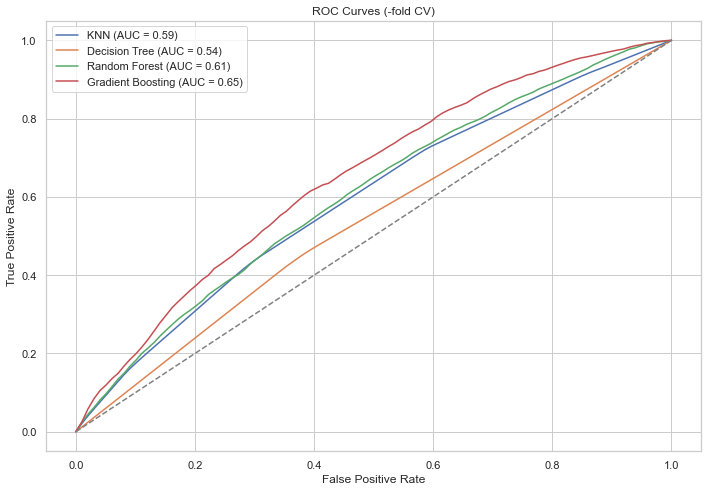

In [33]:
from sklearn.model_selection import StratifiedKFold

X = df_Endometriosis.drop(columns=['Diagnosis', 'Diagnosis_numeric'])
y = df_Endometriosis['Diagnosis']


categorical_features = ['Menstrual_Irregularity', 'Hormone_Level_Abnormality', 'Infertility']
numerical_features = ['Age', 'Chronic_Pain_Level', 'BMI']


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


selector = SelectKBest(mutual_info_classif, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

# Prepare models
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}
from sklearn.metrics import accuracy_score
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
print("Mean Accuracy (10-Fold CV):")
for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    accuracies = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    print(f"{model_name}: {np.mean(accuracies):.4f}")



plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_train, y_train)
        y_prob = pipeline.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(auc(fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, label=f'{model_name} (AUC = {mean_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curves (-fold CV)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()

from IPython.display import display
display(feature_scores)
plt.show()




###  Model Traning - with 10-fold cross-validation And SelectKBest K=4

In [25]:

X = df_Endometriosis.drop(columns=['Diagnosis', 'Diagnosis_numeric'])
y = df_Endometriosis['Diagnosis']


categorical_features = ['Menstrual_Irregularity', 'Hormone_Level_Abnormality', 'Infertility']
numerical_features = ['Age', 'Chronic_Pain_Level', 'BMI']

s
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


selector = SelectKBest(mutual_info_classif, k=4)
X_selected = selector.fit_transform(X_resampled, y_resampled)
selected_features = X.columns[selector.get_support()]


models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


voting_clf = VotingClassifier(estimators=[
    ('knn', models['KNN']),
    ('rf', models['Random Forest']),
    ('gb', models['Gradient Boosting'])
], voting='soft')

models['Voting Ensemble'] = voting_clf


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    accs, precs, recs, f1s, aucs = [], [], [], [], []
    for train_idx, test_idx in cv.split(X_selected, y_resampled):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": np.mean(accs),
        "Precision": np.mean(precs),
        "Recall": np.mean(recs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs)
    })


results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
4,Voting Ensemble,0.637056,0.628169,0.671848,0.649167,0.687918
3,Gradient Boosting,0.624893,0.611787,0.683333,0.645502,0.673736
2,Random Forest,0.624640,0.623831,0.627428,0.625501,0.676288
0,KNN,0.613157,0.604755,0.653270,0.628011,0.645747
1,Decision Tree,0.573635,0.572470,0.581993,0.577053,0.573636


###  Model Traning - with 10-fold cross-validation And SelectKBest K=5

In [26]:

X = df_Endometriosis.drop(columns=['Diagnosis', 'Diagnosis_numeric'])
y = df_Endometriosis['Diagnosis']


categorical_features = ['Menstrual_Irregularity', 'Hormone_Level_Abnormality', 'Infertility']
numerical_features = ['Age', 'Chronic_Pain_Level', 'BMI']


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


selector = SelectKBest(mutual_info_classif, k=5)
X_selected = selector.fit_transform(X_resampled, y_resampled)
selected_features = X.columns[selector.get_support()]


models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


voting_clf = VotingClassifier(estimators=[
    ('knn', models['KNN']),
    ('rf', models['Random Forest']),
    ('gb', models['Gradient Boosting'])
], voting='soft')

models['Voting Ensemble'] = voting_clf

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    accs, precs, recs, f1s, aucs = [], [], [], [], []
    for train_idx, test_idx in cv.split(X_selected, y_resampled):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": np.mean(accs),
        "Precision": np.mean(precs),
        "Recall": np.mean(recs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs)
    })

# Create result DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
4,Voting Ensemble,0.645669,0.635566,0.683333,0.658451,0.702891
2,Random Forest,0.641278,0.638809,0.650396,0.644442,0.697887
0,KNN,0.624979,0.613353,0.676576,0.643383,0.659452
3,Gradient Boosting,0.620840,0.609693,0.672189,0.639222,0.675408
1,Decision Tree,0.594494,0.592876,0.603614,0.598032,0.594493


###  Model Traning - with 10-fold cross-validation And SelectKBest K=6

In [27]:

X = df_Endometriosis.drop(columns=['Diagnosis', 'Diagnosis_numeric'])
y = df_Endometriosis['Diagnosis']


categorical_features = ['Menstrual_Irregularity', 'Hormone_Level_Abnormality', 'Infertility']
numerical_features = ['Age', 'Chronic_Pain_Level', 'BMI']


scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


selector = SelectKBest(mutual_info_classif, k=6)
X_selected = selector.fit_transform(X_resampled, y_resampled)
selected_features = X.columns[selector.get_support()]


models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


voting_clf = VotingClassifier(estimators=[
    ('knn', models['KNN']),
    ('rf', models['Random Forest']),
    ('gb', models['Gradient Boosting'])
], voting='soft')

models['Voting Ensemble'] = voting_clf


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    accs, precs, recs, f1s, aucs = [], [], [], [], []
    for train_idx, test_idx in cv.split(X_selected, y_resampled):
        X_train, X_test = X_selected[train_idx], X_selected[test_idx]
        y_train, y_test = y_resampled[train_idx], y_resampled[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        accs.append(accuracy_score(y_test, y_pred))
        precs.append(precision_score(y_test, y_pred))
        recs.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        aucs.append(roc_auc_score(y_test, y_prob))

    results.append({
        "Model": name,
        "Accuracy": np.mean(accs),
        "Precision": np.mean(precs),
        "Recall": np.mean(recs),
        "F1 Score": np.mean(f1s),
        "ROC AUC": np.mean(aucs)
    })

# Create result DataFrame
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
4,Voting Ensemble,0.660191,0.648049,0.700895,0.673318,0.717299
2,Random Forest,0.652424,0.649130,0.663909,0.656336,0.714710
0,KNN,0.638911,0.625128,0.694478,0.657908,0.675819
3,Gradient Boosting,0.627341,0.619874,0.658169,0.638363,0.678630
1,Decision Tree,0.602348,0.599739,0.615604,0.607489,0.602346


In [55]:


# Define all the results as dataframes
results_10_Fold = {
    'Model': ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting' ],
    'Accuracy': [0.5912, 0.5525, 0.5937, 0.6252],
    'Precision': [0.4987, 0.4521, 0.5026, 0.5661],
    'Recall': [0.4336, 0.4610, 0.4018, 0.3473],
    'F1 Score': [0.4638, 0.4564, 0.4462, 0.4301],
    'ROC AUC': [0.5932, 0.5380, 0.6040, 0.6505]
}


results_10_Fold_Balanced = {
    'Model': ['KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting' ],
    'Accuracy': [0.5682, 0.5320, 0.5678, 0.6042],
    'Precision': [0.4755, 0.4385, 0.4751, 0.5115],
    'Recall': [0.5735, 0.5281, 0.5712, 0.6408],
    'F1 Score': [0.5197, 0.4789, 0.5184, 0.5687],
    'ROC AUC': [0.5894, 0.5313, 0.5987, 0.6480]
}

results_k4 = {
    'Model': ['Voting Ensemble', 'Gradient Boosting', 'Random Forest', 'KNN', 'Decision Tree'],
    'Accuracy': [0.637056, 0.624893, 0.624640, 0.613157, 0.573635],
    'Precision': [0.628169, 0.611787, 0.623831, 0.604755, 0.572470],
    'Recall': [0.671848, 0.683333, 0.627428, 0.653270, 0.581993],
    'F1 Score': [0.649167, 0.645502, 0.625501, 0.628011, 0.577053],
    'ROC AUC': [0.687918, 0.673736, 0.676288, 0.645747, 0.573636]
}


results_k5 = {
    'Model': ['Voting Ensemble', 'Random Forest', 'KNN', 'Gradient Boosting', 'Decision Tree'],
    'Accuracy': [0.645669, 0.641278, 0.624979, 0.620840, 0.594494],
    'Precision': [0.635566, 0.638809, 0.613353, 0.609693, 0.592876],
    'Recall': [0.683333, 0.650396, 0.676576, 0.672189, 0.603614],
    'F1 Score': [0.658451, 0.644442, 0.643383, 0.639222, 0.598032],
    'ROC AUC': [0.702891, 0.697887, 0.659452, 0.675408, 0.594493]
}

results_k6 = {
    'Model': ['Voting Ensemble', 'Random Forest', 'KNN', 'Gradient Boosting', 'Decision Tree'],
    'Accuracy': [0.660191, 0.652424, 0.638911, 0.627341, 0.602348],
    'Precision': [0.648049, 0.649130, 0.625128, 0.619874, 0.599739],
    'Recall': [0.700895, 0.663909, 0.694478, 0.658169, 0.615604],
    'F1 Score': [0.673318, 0.656336, 0.657908, 0.638363, 0.607489],
    'ROC AUC': [0.717299, 0.714710, 0.675819, 0.678630, 0.602346]
}


# Convert to DataFrames
dfs = {
    '10_Fold': pd.DataFrame(results_10_Fold),
    '10_Fold_Balanced': pd.DataFrame(results_10_Fold_Balanced),
    'K=4': pd.DataFrame(results_k4),
    'K=5': pd.DataFrame(results_k5),
    'K=6': pd.DataFrame(results_k6)
}

# Add config type to distinguish later
for name, df in dfs.items():
    df['Config'] = name

# Combine all into a single DataFrame
full_df = pd.concat(dfs.values())
full_df.set_index(['Config', 'Model'], inplace=True)
full_df = full_df.reset_index()



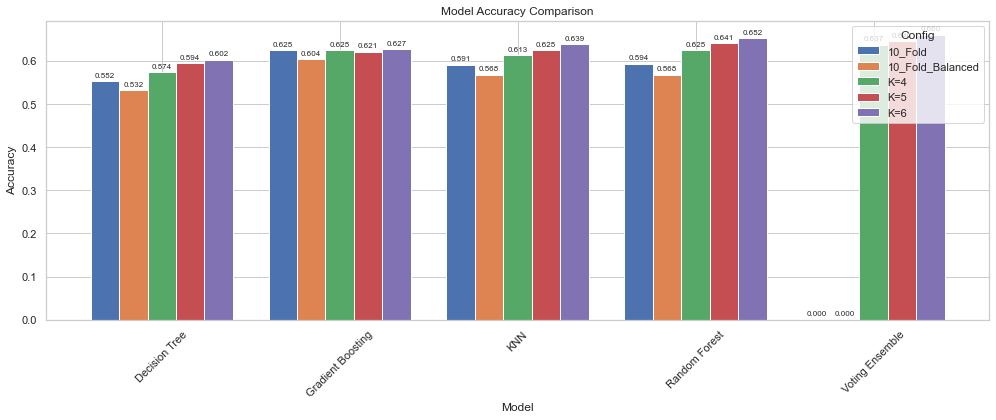

In [56]:
metric = 'Accuracy'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()


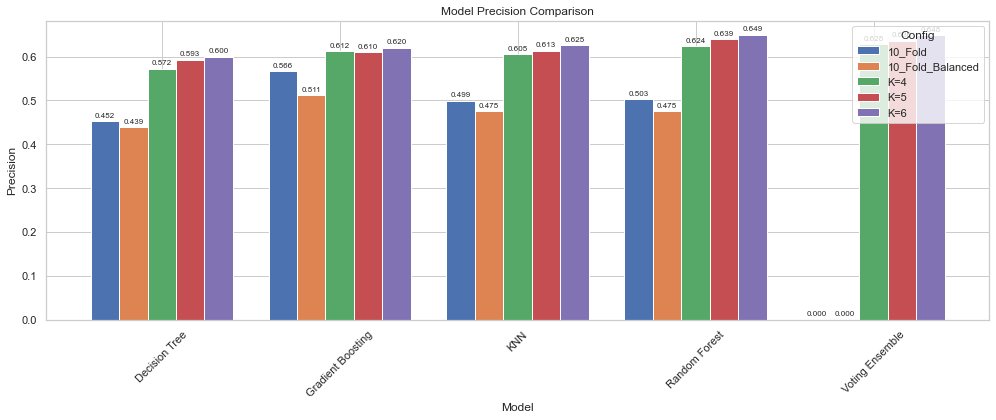

In [57]:
metric = 'Precision'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model Precision Comparison')
ax.set_ylabel('Precision')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()


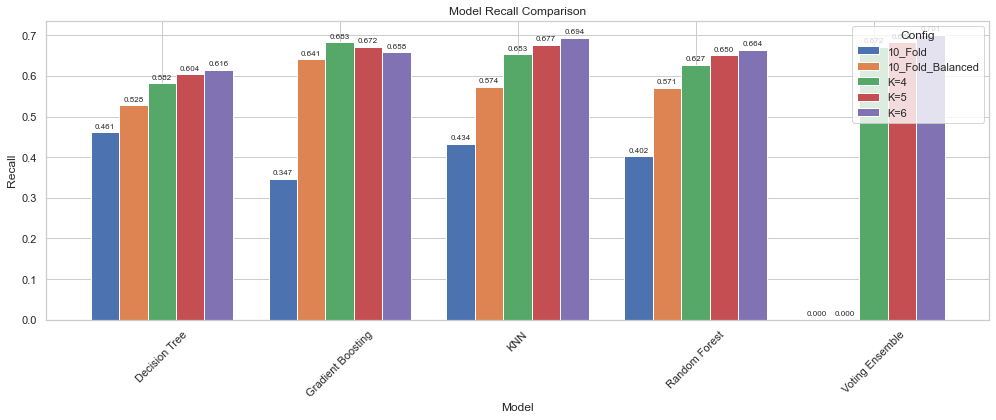

In [58]:
metric = 'Recall'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model Recall Comparison')
ax.set_ylabel('Recall')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()


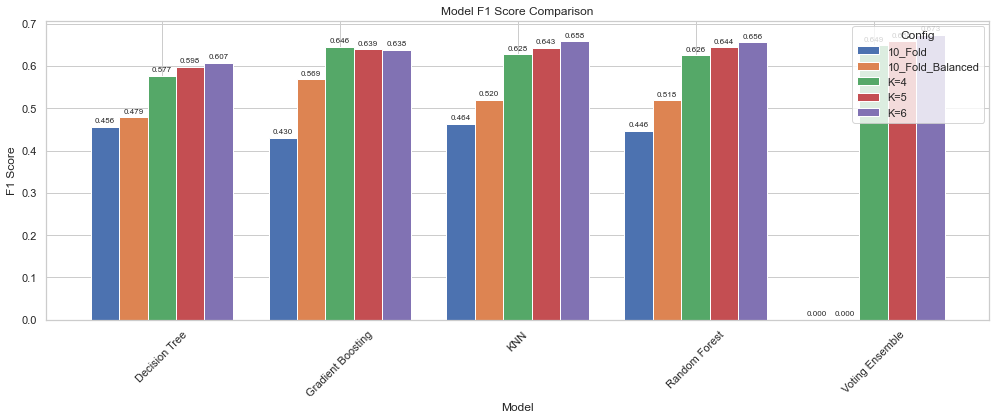

In [59]:
metric = 'F1 Score'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model F1 Score Comparison')
ax.set_ylabel('F1 Score')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()


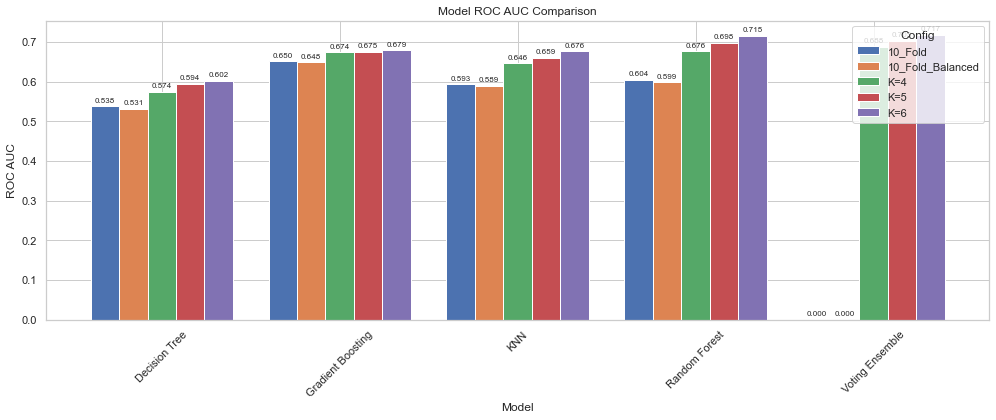

In [60]:
metric = 'ROC AUC'
plot_data = full_df.pivot(index='Model', columns='Config', values=metric)

ax = plot_data.plot(kind='bar', figsize=(14, 6), width=0.8)
ax.set_title('Model ROC AUC Comparison')
ax.set_ylabel('ROC AUC')
ax.set_xlabel('Model')
ax.legend(title='Config')
ax.tick_params(axis='x', labelrotation=45)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()
